In [111]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

메모리 용량에 맞지 않는 아주 큰 규모의 데이터셋으로 훈련하려면? 심지어 그런 데이터셋을 전처리까지 해야 한다면?

텐서플로의 데이터 API를 사용하면 편리하다. 텍스트, 이진 파일, SQL 데이터베이스, 다양한 오픈소스 데이터 역시 효율적으로 읽고 표준 전처리 층을 통해 처리할 수 있는 API를 제공한다.

### 데이터 API

우선 데이터셋이란, 연속된 데이터샘플을 의미한다. 보통은 디스크에서 데이터를 점진적으로 읽어오지만, 이번에는 메모리에서 간단하게 전체 데이터셋을 생성해보자.

In [1]:
import tensorflow as tf

In [2]:
X = tf.range(10)  # [0 ~ 9까지]의 배열 형태의 텐서
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
dataset.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

In [5]:
tf.data.Dataset.range(10) 

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

위는 TensorSliceDataset, 아래는 RangeDataSet이지만 둘은 동일하다고 봐도 무방하다.

더 진행하기 전에 데이터 API에 대해서 좀 더 자세히 살펴보도록 하자.

tf.data API는 **입력 파이프라인 빌드**이다. 

그 중에서 특히 tf.data.Dataset은 다음과 같은 작용을 하는데,
1. 입력한 데이터에서 원천 데이터셋을 만들고,
2. 데이터 전처리를 통해 데이터셋을 변형한다.
3. 이것을 데이터셋 전역에 반복하고 요소를 출력한다.

이 반복은 스트리밍 형식으로 이루어지며, 그렇기 때문에 메모리에 데이터셋 전체가 들어갈 필요가 없다.

사용법에 대해서는 이후에 예시와 함께 보도록 하자

### 연쇄 변환

데이터셋이 준비되면 데이터셋을 변환할 수 있다. 위에서 2의 과정이 이루어진다고 볼 수 있다.

In [6]:
# 기존에 만든 dataset (텐서 [0,1,2,3,4,5,6,7,8,9]를 3번 반복하여, 배치 7단위로 나눔)
dataset_1 = dataset.repeat(3).batch(7)
for item in dataset_1:
    print(item)
print('\n')
dataset_2 = dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset_2:
    print(item)
    
# 위와 아래의 차이점은, drop_remainder=True를 배치 메서드에 지정해주었다는 것이다.
# 즉, 배치 shape가 되지 않는 나머지 데이터를 버린다.

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [7]:
# map() 메서드를 통한 변환
dataset = dataset.map(lambda x: x*2)

In [8]:
for i in dataset:
    print(i)
    
# map(lambda x)를 통해, 각 아이템에 변환을 해주었다.

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


In [9]:
# 데이터셋 전체에 변환을 적용하려면 apply() 를 사용할 수 있다.
dataset = dataset_1.apply(tf.data.experimental.unbatch())

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [10]:
dataset # unbatchdataset 형태의 요소가 되었다

for i in dataset:
    print(i) # 묶였던 배치를 풀어주는 역할을 한다.

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype

In [11]:
# 또한 조건을 걸고 데이터셋을 필터링하기 위해서는 .filter(lambda x)를 사용한다
for item in dataset.take(3):
    print(item)
    
# dataset.take(x)는 앞에서부터 x개의 아이템만 보고자 할 때 사용한다.

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 데이터 셔플링

1. 원본 데이터셋 / 버퍼가 존재한다
2. 원본 데이터셋의 아이템을 buffer_size만큼 추출하여 버퍼에 채운다
3. 아이템이 요청되면 버퍼에서 하나를 꺼내고, 원본에서 버퍼의 빈 자리를 채운다
4. 원본의 모든 아이템이 사용될때까지 1~3을 반복한다.

5. 버퍼가 비워질 때까지 다시 랜덤하게 아이템을 반환한다.

In [12]:
# shuffle : 데이터 샘플을 독립적이고 동일한 분포로 만들고자 한다.
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


In [13]:
# 데이터셋이 매우 클 떄는, 간단한 셔플링 버퍼 방식으로는 충분하지 않다.
# 원본 데이터 자체를 섞고, 에포크마다 한 번씩 더 섞어준다.
# 예를 들어, 캘리포니아 주택 데이터셋이 있다고 하자

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1),
                                                             random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                     random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [14]:
import numpy as np
import os

In [15]:
# 이렇게 매우 큰 데이터셋의 경우, 먼저 여러 개의 파일로 나눈 뒤 텐서플로에서 병렬로 읽는다
# 우선, 여러 개로 나누는 함수를 짜보자

# data와 name_prefix를 인자로 받아 여러개의 csv로 나누는 함수이다.
def save_to_multiple_csv(data, name_prefix, header=None, n_parts=10):
    # 저장경로와 파일 형식은 잘 알 것이니 넘어가고,
    housing_dir = os.path.join('datasets', 'housing')
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, 'my_{}_{:02d}.csv')
    
    # 이제 파일을 저장하기 위한 filepaths를 만들어야 하는데,
    filepaths = []
    m = len(data)
    # np.arange(m)을 n_parts로 분리하면 각각의 인덱스와 해당하는 배열이 나오고,
    # 거기에 enumerate를 사용해 행 별 연산이 가능하도록 한다.
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        # 각각의 part_csv를 이어서 filepaths에 저장하면
        filepaths.append(part_csv)
        with open(part_csv, 'wt', encoding='utf-8') as f:
            if header is not None:
                f.write(header)
                f.write('\n')
            for row_idx in row_indices:
                f.write(','.join([repr(col) for col in data[row_idx]]))
                f.write('\n')
    return filepaths

In [16]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ['MedianHouseValue']
header = ','.join(header_cols)

# 해당 path_format에 저장된다.
train_filepaths = save_to_multiple_csv(train_data, 'train', header, n_parts=20)
valid_filepaths = save_to_multiple_csv(valid_data, 'valid', header, n_parts=10)
test_filepaths = save_to_multiple_csv(test_data, 'test', header, n_parts=10)

In [17]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [18]:
# 파일의 패턴을 이용해 가져올 수도 있다
train_filepaths = 'datasets/housing/my_train_*.csv'

filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

# 단, list_files는 파일 경로를 섞은 데이터셋을 반환한다.
# 정 원치 않으면 shuffle=False로 섞지 않을 수도 있다.

In [19]:
# 다음으로, interleave() a메서드를 통해 한 번에 다섯 개의 파일을 한 줄씩 번갈아가면서 읽는다

n_readers = 5
# 함수를 보면, interleave 뒤에 lambda로 각 파일에 대해 함수를 전달하였다.
# 이것은 TextLineDataset을 통해 이루어지는데, filepath는 파일 경로 데이터셋에 들어있는 
# 파일 경로 요소를 의미한다?

# textlinedataset은 텍스트 파일 등에서 텍스트를 가져와 데이터셋을 만들고, 각 줄을
# 데이터셋의 요소로 바꿔주는 메서드이다. 그러므로 이 식은, filepath_dataset에서 
# n_readers 만큼 파일을 가져와, 그것을 각각의 textlinedataset에 지정하고, 맨 윗줄을
# 스킵한 뒤 순회하는 것이다.
dataset = filepath_dataset.interleave(lambda filepath:
                                     tf.data.TextLineDataset(filepath).skip(1),
                                     cycle_length = n_readers)

In [20]:
for i in dataset.take(5):
    print(i)
    
# 바이트스트링이 텐서 안에 들어있다. 이를 파싱하고 스케일을 조정할 필요가 있다.

tf.Tensor(b'4.2083,44.0,5.323204419889502,0.9171270718232044,846.0,2.3370165745856353,37.47,-122.2,2.782', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)
tf.Tensor(b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625', shape=(), dtype=string)
tf.Tensor(b'3.3456,37.0,4.514084507042254,0.9084507042253521,458.0,3.2253521126760565,36.67,-121.7,2.526', shape=(), dtype=string)
tf.Tensor(b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442', shape=(), dtype=string)


In [21]:
# 이제 이렇게 분리된 데이터들을 전처리 해야 하는데..

n_inputs = 8

# X_mean, X_std는 스케일링 후에 계산해준 바 있다.
@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    # tf.io.decode_csv : csv 레코드를 텐서로 바꿔준다. 각 '열'은 텐서 하나로 취급한다.
    fields = tf.io.decode_csv(line, record_defaults=defs)
    # 이렇게 되면 스칼라 텐서의 형태로 반환되는데, 이 텐서를 쌓아 1차원 배열을 만드려고 한다.
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x- X_mean) / X_std, y

In [22]:
preprocess(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.36618188, -0.99870497,  0.00781878, -0.00675364, -0.06140144,
         0.0072037 , -0.94465536,  0.93674636], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.418], dtype=float32)>)

### 데이터 적재와 전처리를 합치기

이제 우리는 이 코드를 재사용 가능하게 만들기 위해 하나의 헬퍼 함수로 만드려고 한다.

In [23]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None, 
                      shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    # 파일들의 경로를 정해진 횟수만큼 반복하여 데이터셋으로 만든다 (1)
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    # interleave 단계로, 파일들을 텍스트 데이터셋으로 만든 뒤 num_parallel_calls 만큼 돌아가며 읽는다
    dataset = dataset.interleave(lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
                                cycle_length = n_readers, num_parallel_calls=n_read_threads)
    # 이렇게 해서 이것들을 shuffle 하고 나면,
    dataset = dataset.shuffle(shuffle_buffer_size)
    # 전처리 작업을 각자 진행해주면 된다
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    
    return dataset.batch(batch_size).prefetch(1)
# return dataset.apply(tf.data.experimental.prefetch_to_device('/gpu:0'), buffer_size)

위의 함수에서, prefetch(1) 부분은 성능에 매우 큰 영향을 준다. 훈련 알고리즘이 한 배치로 작업하는 동안 다음 배치를 미리 준비해놓게 되는데, GPU가 훈련하는 동안 CPU가 미리 준비해두므로 프리페치를 사용하지 않는 것보다 속도가 상승하게 된다.

In [24]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print ('X =', X_batch,'\n', 'y=', y_batch)

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32) 
 y= tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)
X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32) 
 y= tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)


In [25]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

### keras와 데이터셋

In [26]:
from tensorflow import keras

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [28]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [29]:
batch_size = 32
model.fit(train_set, steps_per_epoch = len(X_train)//batch_size, epochs=10,
         validation_data = valid_set
)

Epoch 1/10
362/362 [==============================] - 4s 7ms/step - loss: 2.0509 - val_loss: 4.6662
Epoch 2/10
362/362 [==============================] - 1s 4ms/step - loss: 0.7463 - val_loss: 0.6669
Epoch 3/10
362/362 [==============================] - 1s 4ms/step - loss: 0.6308 - val_loss: 0.6373
Epoch 4/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5898 - val_loss: 0.5755
Epoch 5/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5506 - val_loss: 0.5536
Epoch 6/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5554 - val_loss: 0.5247
Epoch 7/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5082 - val_loss: 0.5690
Epoch 8/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5023 - val_loss: 0.4819
Epoch 9/10
362/362 [==============================] - 1s 4ms/step - loss: 0.4904 - val_loss: 0.4820
Epoch 10/10
362/362 [==============================] - 1s 4ms/step - loss: 0.4933 - val_loss: 0.4559

In [30]:
model.evaluate(test_set, steps=len(X_test)//batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4653


0.4652501046657562

In [31]:
# 보다시피, evaluate()와 predict() 메서드에도 새로운 데이터셋을 전달할 수 있다.
new_set = test_set.map(lambda X, y : X)
X_new = X_test
model.predict(new_set, steps=len(X_new)//batch_size)

161/161 [==============================] - 0s 1ms/step


array([[3.9114003],
       [2.3614645],
       [0.862759 ],
       ...,
       [3.338993 ],
       [1.6530392],
       [3.1773815]], dtype=float32)

In [32]:
# 이렇게 해서 기존의 방식대로 훈련 세트를 반복할 수도 있고, 그것을 위한
# 텐서플로 함수 역시 만들 수 있다.

optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32, n_readers=5, n_read_threads=5,
         shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                                  n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                                  n_parse_threads=n_parse_threads, batch_size=batch_size)

    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        

train(model,5)

## TFRecord 포맷

텐서플로는 대용량 데이터를 효율적으로 읽기 위해 TFRecord를 선호한다. 이것은 크기가 다른 연속된 이진 레코드를 저장하는 단순한 이진 포맷이다. 

TFRecord를 이용하는 이유는, 데이터를 직렬화하여 각각을 선형적으로 읽음으로써 실시간 처리나 전처리 캐싱을 효율적으로 진행하기 위해서이다.

In [33]:
# 간단한 TFRecord
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b'This is the first record')
    f.write(b'And this is the second record')
    
# 위 함수를 시행하면 지정된 폴더에 my_data.tfrecord 파일이 저장된다

In [34]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)
    
# 기본적으로 레코드는 위에서부터 차례로 읽히지만, num_parallel_reads를 지정하여 
# 여러 파일에서 레코드를 번갈아 읽을 수 있다. (위의 interleave() 역시 가능하다)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### TFRecord 압축

In [35]:
options = tf.io.TFRecordOptions(compression_type='GZIP')
with tf.io.TFRecordWriter('my_compressed.tfrecord', options) as f:
    f.write(b'This is the first record')
    f.write(b'And this is the second record')

In [36]:
dataset = tf.data.TFRecordDataset(['my_compressed.tfrecord'], compression_type='GZIP')
for item in dataset:
    print(item)
    
# options 매개변수에 압축 타입을 지정하여 압축하고,
# 뒤에 불러올 때는 압축 형식을 지정해서 불러올 수 있다.

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### 프로토콜 버퍼

구조화된 데이터의 효율적인 직렬화를 위한 플랫폼 및 언어 간 라이브러리

사용을 위해서는 프로토콜 버퍼 컴파일러가 필요하다..

**Protocol Buffers란?**

위에서 언급한 것처럼, 데이터의 직렬화를 위한 매커니즘으로, XML보다 빠르다고 한다. 

**어떻게 동작하는가?**

.proto 파일에 protocol buffer message 타입을 정의하는데, 자세한 것은 아래의 예시를 보면서 함께 보도록 하자.

<!-- person.proto 파일로 아래의 내용을 저장하겠다 -->
%%writefile person.proto
<!-- syntax : proto3 버전을 이용하고 있다는 것을 설정한다. syntax가 비어있으면 자동으로 proto2 타입을 사용하는 것으로 간주된다. -->
syntax = 'proto3';
<!-- 맨 앞의 message는 메시지를 정의하는 명령어인데, 이 예문의 메시지는 Person 객체를 형성한다. -->
message Person {
<!-- 메시지 필드는 다음과 같은 순서로 구성된다. 
(필드규칙 -> 필드타입 -> 필드 레이블명 -> 숫자태그) -->
<!-- 필드의 규칙은 다음과 같다 
    * required : message는 이 필드를 정확히 1개만 가진다.
    * optional : message는 이 필드를 가지지 않거나, 1개만 가진다.
    * repeated : 이 필드는 여러번 반복될 수 있다.
    * map : <일련의 포맷> -->
<!-- 규칙이 작성되어있지 않은 것은 내재 필드로 간주되며, 잘 짜인 메시지는 없거나 하나만 가지고 있어야 한다. (그 이상은 안 된다) -->
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}


In [63]:
%%writefile person.proto
syntax = "proto3";
message Person {
    optional string name = 1;
    optional int32 id = 2;
    repeated string email = 3;
}

# 매직명령어는 항상 최상단에 위치할 것
# 즉, 아래의 메시지를 잘 짜인 메시지로 고치려면, 교재 내용대로라면 string, int32 앞에 optional을 달아주면 될 것


SyntaxError: invalid syntax (986377698.py, line 5)

In [61]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [62]:
!dir person*

# 잘 되고 있는건지 모르겠다..
# 참고로 !ls 는 우분투 명령어이며, 윈도우 환경에서는 !dir 을 사용하면 된다

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7ED0-9BFC

 C:\Users\donga\HandsOn 디렉터리

2023-09-20  오후 03:07               118 person.desc
2023-09-20  오후 03:07               134 person.proto
2023-09-20  오후 03:07             1,052 person_pb2.py
               3개 파일               1,304 바이트
               0개 디렉터리  149,036,756,992 바이트 남음


In [64]:
from person_pb2 import Person
# person 객체를 만든다.
person = Person(name='Al', id=123, email=['a@b.com'])

In [65]:
print(person)

name: "Al"
id: 123
email: "a@b.com"



In [66]:
person.name

'Al'

In [67]:
person.email[0] # repeated 필드이기 때문에, 배열처럼 참조할 수 있다.

'a@b.com'

In [72]:
print(type(person.name), '\n', type(person.id), '\n', type(person.email))

# 보다시피, repeated field는 RepeatedScalarFieldContainer 객체로 참조되며,
# person은 string, id는 int로 참조되었음을 알 수 있다.
# 즉, name에 [0]을 쓰면 A가 출력될 것이고 int는 오류가 발생할 것이다.

<class 'str'> 
 <class 'int'> 
 <class 'google.protobuf.internal.containers.RepeatedScalarFieldContainer'>


In [73]:
person.email.append('c@d.com') # 주소를 추가한다.

In [76]:
s = person.SerializeToString()
print(s) # 실제로 person_pb2.py를 열어보면 이 내용을 확인할 수 있음

b'\n\x02Al\x10{\x1a\x07a@b.com\x1a\x07c@d.com'


In [77]:
person2 = Person()
person2.ParseFromString(s) # 바이트 문자열 파싱
person == person2

True

이렇게 직렬화된 Person 객체를 TFRecord로 저장한 뒤 읽고 파싱할 수 있으나, 텐서플로 연산이 아닌 부분, 예를 들어 직렬화나, 파싱하는 부분은 텐서플로 함수에 포함되지 않는다.

텐서플로는 이런 연산을 제공하기 위한 프로토콜 버퍼 정의를 가지고 있다.

In [84]:
# tf.io.decode_proto : 직렬화된 프로토콜 버퍼 메시지를 텐서로 추출해준다

person_tf = tf.io.decode_proto(
bytes=s, message_type='Person', field_names=['name', 'id', 'email'],
output_types = [tf.string, tf.int32, tf.string],
descriptor_source = 'person.desc')

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Al'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123])>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>]

In [82]:
tf.train.Example

tensorflow.core.example.example_pb2.Example

syntax = 'proto3';
message BytesList {repeated bytes value=1;}
message FloatList {repeated float value=1 [packed=true];}
* packed=true : 수치로 된 필드를 효율적으로 인코딩할 수 있다고 한다
message Int64List {repeated int64 value=1 [packed=true];}  
message Feature {   
    oneof kind {  
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};

message Features { map <string, Feature> feature = 1; };
message Example { Features features = 1; };

In [86]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [87]:
person_example = Example(
features=Features(
feature = {
    'name': Feature(bytes_list=BytesList(value=[b'Alice'])),
    'id': Feature(int64_list=Int64List(value=[123])),
    'emails': Feature(bytes_list=BytesList(value=[b'a@b.com',b'c@d.com']))
}))

In [88]:
with tf.io.TFRecordWriter('my_contacts.tfrecord') as f:
    f.write(person_example.SerializeToString())
    
# 지금까지, 예시 프로토콜 버퍼문을 만들어 직렬화하여 tfrecord로 저장하였다.
# 이제 이것을 읽고 파싱하면 된다.

그런데 지금까지 계속 파싱 파싱했는데.. 그래서 파싱이 대체 뭔가?

한 줄로 쓰자면 Parsing : 프로그램 언어를 분석하여 가공하여, 원하는 때 불러올 수 있도록 하는 것 이라고 보면 될 것이다.

### Example 버퍼를 읽고 파싱하기

In [89]:
# fixedlenfeature : 고정길이의 입력 특성(shape,dtype,default_value) / varlenfeature : 가변길이의 입력특성(dtype만)
# id는 위에서 int64로 형식을 지정해줬으니까 fixedlenfeature 인건 그럴 수 있다고 하자..
# 그런데 name은 왜? emails는 왜 varlenfeature인가?
# 도메인 지식?
feature_description = {
    'name': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'id': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'emails': tf.io.VarLenFeature(tf.string),
}

for serialized_example in tf.data.TFRecordDataset(['my_contacts.tfrecord']):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

In [91]:
feature_description['name']

FixedLenFeature(shape=[], dtype=tf.string, default_value='')

In [92]:
parsed_example

# 파싱된 데이터를 보면, 가변 길이 특성은 희소 텐서로 파싱되었다.
# 밀집 텐서로 변환할 수는 있으나 그냥 희소텐서의 값을 참조하는 것이 간단할 것

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x19ce79cb0a0>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [94]:
parsed_example['emails'].values.numpy()

array([b'a@b.com', b'c@d.com'], dtype=object)

어떤 이진데이터라도, 심지어 이미지까지 텐서플로우 라이브러리는 파싱을 지원한다. 그렇기 떄문에 대부분의 경우에는 example 버퍼로 충분하나, 리스트의 리스트를 다룰 때는?

#### 참고 : TFRecord에 이미지 넣기

In [95]:
cat_in_snow  = tf.keras.utils.get_file(
    '320px-Felis_catus-cat_on_snow.jpg',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

17858/17858 [==============================] - 0s 0us/step


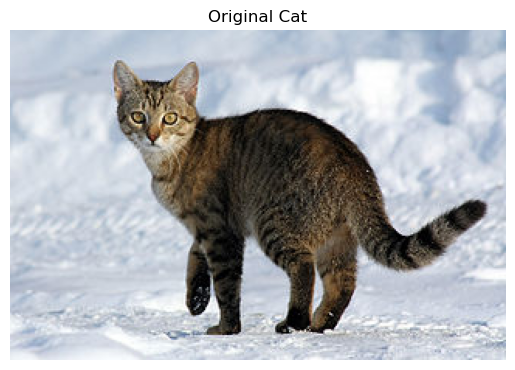

In [110]:
import matplotlib.pyplot as plt
img = plt.imread('C:\\Users\\donga\\.keras\\datasets\\320px-Felis_catus-cat_on_snow.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Original Cat')
plt.show()

In [112]:
# 이미지를 직렬화하고 TFRecord로 저장

data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    'image': Feature(bytes_list=BytesList(value=[data.numpy()]))
}))
serialized_example = example_with_image.SerializeToString()

with tf.io.TFRecordWriter('snow_cat.tfrecord') as f:
    f.write(serialized_example)

In [113]:
# example 버퍼 파싱
feature_description = {
    'image': tf.io.VarLenFeature(tf.string)
}

for serialized_example in tf.data.TFRecordDataset(['snow_cat.tfrecord']):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

In [114]:
parsed_example  # 이미지가 희소텐서로 저장되었음을 볼 수 있음

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x19d18116490>}

In [116]:
decoded_img = tf.io.decode_image(parsed_example['image'].values[0])

In [117]:
decoded_img

<tf.Tensor: shape=(213, 320, 3), dtype=uint8, numpy=
array([[[193, 207, 220],
        [193, 207, 220],
        [193, 207, 220],
        ...,
        [168, 191, 205],
        [161, 184, 202],
        [156, 182, 199]],

       [[194, 208, 221],
        [194, 208, 221],
        [194, 208, 221],
        ...,
        [168, 191, 207],
        [161, 184, 202],
        [155, 181, 198]],

       [[195, 209, 222],
        [195, 209, 222],
        [195, 209, 222],
        ...,
        [168, 191, 207],
        [160, 183, 201],
        [153, 178, 198]],

       ...,

       [[230, 238, 241],
        [231, 239, 242],
        [234, 242, 245],
        ...,
        [211, 220, 229],
        [213, 220, 228],
        [203, 210, 216]],

       [[232, 240, 243],
        [234, 242, 245],
        [236, 244, 247],
        ...,
        [217, 226, 235],
        [221, 228, 236],
        [213, 220, 226]],

       [[233, 241, 243],
        [234, 242, 244],
        [237, 245, 247],
        ...,
        [221, 230, 23

그림 저장: Decoded Cat


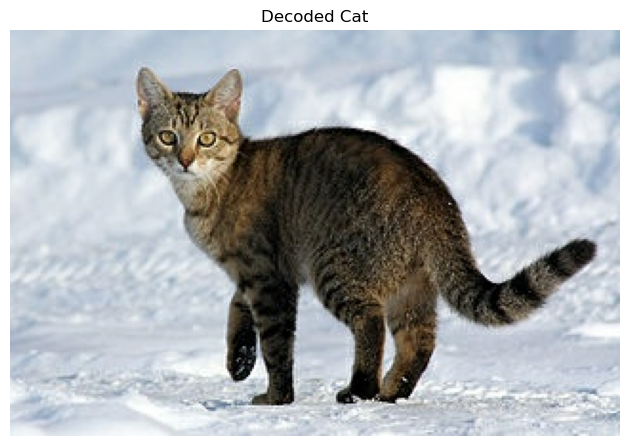

In [119]:
plt.imshow(decoded_img)
plt.title('Decoded Cat')
plt.axis('off')
save_fig('Decoded Cat')
plt.show()

### SequenceExample 프로토콜 버퍼

>SequenceExample 프로토콜 버퍼의 정의

syntax = 'proto3';

<!-- FeatureList : 하나의 Features 객체를 포함 -->
message FeatureList { repeated Feature feature = 1;};
<!-- FeatureLists : 한 개 이상의 FeatureList를 가진 FeatureLists 객체를 포함 -->
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
};

Example을 만들고, 직렬화하고, 파싱하는 것은 비슷하나 parse_sequence_example()를 사용해야 한다. (좀 전은 parse_single_example()을 사용했다)

또한 context가 들어간다는 것이 차이가 있다. context안에는 전체 example에 적용되는 특성이 들어있다.

In [121]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

# context안에 전 features가 들어있다. features는 각각의 feature을 딕셔너리로 묶은 것이다.
context = Features(feature={
    'author_id': Feature(int64_list=Int64List(value=[123])),
    'title': Feature(bytes_list=BytesList(value=[b'A', b'desert', b'place', b'.'])),
    'pub_date': Feature(int64_list=Int64List(value=[1623,12,25]))
})

content = [['When', 'shall', 'we', 'three', 'meet', 'again', '?'],
          ['In', 'thunder', ',', 'Lightning', ',', 'or', 'in', 'rain', '?']]
comments = [['When', 'the', 'hurlyburly', "'s", 'done', '.'],
           ['When', 'the', 'battle', "'s", 'lost', 'and', 'won', '.']]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode('utf-8') for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

sequence_example = SequenceExample(
context = context,
feature_lists = FeatureLists(feature_list={
    'content': FeatureList(feature=content_features),
    'comments': FeatureList(feature=comments_features)
}))


In [122]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

관련없는 이야기지만.. 이 문구는 맥베스 1막 1장의 마녀들의 대사라고 한다.
그럼 이 시퀀스들로 다음 문구인 'That will be ere the set of sun.' 을 예측할 수 있는걸까?

In [124]:
serialized_sequence_example = sequence_example.SerializeToString()

context_feature_descriptions = {
    'author_id': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'title': tf.io.VarLenFeature(tf.string),
    'pub_date': tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}

sequence_feature_descriptions = {
    'content': tf.io.VarLenFeature(tf.string),
    'comments': tf.io.VarLenFeature(tf.string),
}

parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(serialized_sequence_example,
                                                                          context_feature_descriptions,
                                                                          sequence_feature_descriptions)

In [125]:
parsed_context

{'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x19d1810b520>,
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25], dtype=int64)>}

In [126]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'],
 [b'In', b'thunder', b',', b'Lightning', b',', b'or', b'in', b'rain', b'?']]>


# 입력 특성 전처리

신경망을 이용해 데이터를 처리하려면, 모든 특성을 수치화하고 정규화해야 한다.

정규화 방법은 직접 선호하는 도구 (넘파이, 판다스, 사이킷런 등..) 를 사용하는 방법도 있겠지만, 데이터 API로 데이터를 적재할 떄 동적으로 처리할 수도 있고, 모델 자체에 전처리 층을 포함시킬 수도 있다.

아래의 코드는 Lambda 층을 사용해 표준화를 수행하는 층을 구현했다.

In [128]:
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()  # 0으로 나누는 것을 방지하기 위한 매우 작은 값
model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs:(inputs-means) / (stds+eps)),
    ...
])

TypeError: The added layer must be an instance of class Layer. Received: layer=Ellipsis of type <class 'ellipsis'>.

In [129]:
# 혹은 완전한 사용자 정의 층을 이용할 수도 있다
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.meanss_) / (self.stds_ + keras.backend.epsilon())

In [130]:
std_layer  = Standardization()
# std_layer.adapt(데이터셋의 샘플)

NameError: name 'data_sample' is not defined

이제 이 뒤로는 일반적인 층처럼 이용할 수 있다..

지금까지는 수치형 데이터의 정규화를 살펴보았다. 그렇다면 범주형 특성은 어떻게 처리를 해야 하는가?

### 원핫 인코딩

In [133]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [134]:
fetch_housing_data()

In [137]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [138]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [139]:
# 이 중에서 범주형 특성은 무엇일까?
housing.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [141]:
# 이 범주형 특성은 어떤 요소로 구성되어 있을까?
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [157]:
# 이제 범주형 요소의 구성을 알았으니, 인코딩을 시작할 수 있다.

# 이건 범주의 단어들이고..
vocab = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
# 이것은 각 범주의 인덱스인데..
indices = tf.range(len(vocab), dtype=tf.int64)
# 이것은 무슨 일을 하는가?
# 주어진 키:값 텐서로 룩업 테이블을 initialize한다.. 라고 하는데, 그럼 룩업 테이블은 뭔가
# Lookup Table이란, 연산에 대해 미리 계산된 결과들의 배열을 가리킨다.
# 그러니까, 범주 리스트와 인덱스를 매칭시켜둔 결과물을 저장한다고 생각하면 될 것 같다.
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
# oov 버킷 - 어휘 사전 (위의 어휘 리스트)에 없는 범주가 나오면 oov 버킷 중 하나에 할당된다
# 여기서는 oov_bucket이 2개 있으므로 5 혹은 6에 할당될 것이다.
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

# StaticVocabularyTable : OOV String이 들어왔을 때, 해시값을 통해 OOV bucket에 할당하는 기능을 한다

In [150]:
table.lookup(tf.constant(vocab))

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4], dtype=int64)>

In [152]:
categories = tf.constant(['NEAR BAY', 'FOREST', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 5, 2, 2], dtype=int64)>

In [153]:
# 새로운 범주 'FOREST" 는 OOV 버켓에 들어가, 인덱스 5에 할당되었다. 
# 그 뒤에, tf.one_hot() 함수를 사용해 원핫인코딩을 할 수 있다.

cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

### 임베딩을 사용해 범주형 특성 인코딩하기

범주의 개수가 많아지면, 갈 수록 원핫벡터의 길이가 길어져 비효율적이 된다.

임베딩은 범주를 포함하는 훈련 가능한 밀집 벡터로, 초기에는 범주가 랜덤하게 초기화되어있지만, 훈련을 거듭하며 점차 향상된다.

In [164]:
# 1. 임베딩 행렬을 만들어 랜덤하게 초기화 한다
# 범주와 oov 버킷마다 하나의 행이 있고, 임베딩 차원마다 하나의 열을 가진다

embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)

In [165]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.6208451 , 0.35142744],
       [0.3399557 , 0.5266949 ],
       [0.27369344, 0.77060723],
       [0.19219303, 0.8650671 ],
       [0.4890945 , 0.8185408 ],
       [0.2001574 , 0.4194615 ],
       [0.76786935, 0.6509743 ]], dtype=float32)>

In [166]:
categories = tf.constant(['NEAR BAY', 'FOREST', 'INLAND', 'INLAND'])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 5, 2, 2], dtype=int64)>

In [167]:
# 임베딩 행렬에서 주어진 인덱스에 해당하는 행을 찾는다.
# 즉, island의 인덱스가 2이므로 2인 [0.27369344, 0.77060723]가 2번 반복되었다
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.6208451 , 0.35142744],
       [0.2001574 , 0.4194615 ],
       [0.27369344, 0.77060723],
       [0.27369344, 0.77060723]], dtype=float32)>

In [169]:
# 사실 기본적으로 케라스가 임베딩 행렬을 처리해주는 층을 제공한다..

embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets,
                                  output_dim=embedding_dim)

embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.01427437, -0.01745307],
       [ 0.04495287,  0.03309849],
       [-0.03232806,  0.03498839],
       [-0.03232806,  0.03498839]], dtype=float32)>

In [174]:
# 이제 임베딩 계층을 연결하여 임베딩을 학습하는 모델을 만들 수 있다
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)
cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs = [regular_inputs, categories], outputs=[outputs])

### 케라스 전처리층

대표적으로 Normalization, TextVectorization(어휘사전 인덱서를 인코딩), Discretization(구간을 나누고 원핫인코딩), PreprocessingStage(전처리층 연결)..이 있다.

In [185]:
# preprocessingstage을 이용한 예시 - 전처리 파이프라인
normalization = keras.layers.Normalization()
discretization = keras.layers.Discretization()
preprocessing_stage = keras.layers.PreprocessingStage([normalization,
                                                       discretization])
preprocessing_stage.adapt(data_sample)

model = keras.Sequential([
#     preprocessing_stage,
    keras.layers.Dense(10, activation='softmax'),
])
model.fit(data, targets, epochs=10)

# 다만.. preprocessingstage 클래스는 현재 사용할 수 없는 것으로 보인다?
# 2019년 케라스팀 깃허브에 언급된거 외에는 흔적을 찾아볼 수가 없다

AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'PreprocessingStage'

TextVectorization은 인덱스 대신에 BOW (Bag of Words) 옵션 역시 가지고 있다. 단어 카운트는 자주 등장하는 단어의 중요도를 줄이는 방향으로 정규화되어야 한다.

### 카운트 기반의 단어 표현

* BoW 
- 단어의 순서를 고려하지 않고, 단어가 등장하는 빈도 수를 가지고 매핑한다.

* 문서-단어행렬 (DTM)
- 다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것


* TF-IDF (Term Frequency - Inverse Document Frequency)
- 전체 샘플 수를 단어가 등장하는 훈련 샘플 개수로 나눈 로그를 계산한 후 단어 카운트와 곱하는 것
- TF-IDF 로 쓰여있지만 계산하는 방법은 TF * IDF이다

즉, 수식으로 작성하면 다음과 같다

<span style='font-size:150%'>$tf \times log(\frac{n}{1+df(t)}) $</span>

## TF변환

전처리는 계산 비용 자체가 크기 때문에, 훈련과 동시에 진행하는 것보다 미리 처리를 해두는 것이 속도 향상에 이로움.  

이를 위해 작다면 cache() 메서드를 사용할 것이고, 데이터가 아주 크면 아파치 빔이나, 스파크 같은 도구를 쓸 수 있을텐데, 단순히 훈련이 아니라 모델의 배포까지 시행하려면?  

배포 과정에서 전처리를 위한 코드를 추가해야한다면, 모델을 수정할 때마다 배포한 모든 코드를 수덩해야할 것이고, **훈련/서빙 왜곡** 이 일어날 것이다..  

그렇다면 전처리 연산을 딱 한 번만 정의하려면?  

TF 변환을 이용할 수 있다.

## TFDS (Tensorflow Dataset)

널리 사용하는 데이터셋을 tfds에서 다운로드받을 수 있다..

In [196]:
import tensorflow_datasets as tfds

dataset = tfds.load(name='mnist')
mnist_train, mnist_test = dataset['train'], dataset['test']

In [192]:
print(tfds.list_builders())  # 다운받을 수 있는 데이터셋 목록

['abstract_reasoning', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'bigearthnet', 'binarized_mnist', 'binary_alpha_digits', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_corrupted', 'clevr', 'cnn_dailymail', 'coco', 'coco2014', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'downsampled_imagenet', 'dsprites', 'dtd', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eurosat', 'fashion_mnist', 'flores', 'food101', 'gap', 'glue', 'groove', 'higgs', 'horses_or_humans', 'image_label_folder', 'imagenet2012', 'imagenet2012_corrupted', 'imdb_reviews', 'iris', 'kitti', 'kmnist', 'lfw', 'lm1b', 'lsun', 'mnist', 'mnist_corrupted', 'moving_mnist', 'multi_nli', 'nsynth', 'omniglot', 'open_images_v4', 'oxford_flowers102', 'oxford_iiit_pet', 

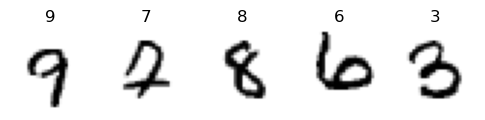

In [197]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item['image']
    labels = item['label']
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ... , 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap='binary')
        plt.title(label)
        plt.axis('off')
    break

In [198]:
dataset = tfds.load(name='mnist', batch_size=32, as_supervised=True)
mnist_train = dataset['train'].prefetch(1)

In [199]:
mnist_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>